In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t

In [229]:
druzine = pd.read_csv('../podatki/Kibergrad.csv')
velikost_populacije = druzine.shape[0]
print(velikost_populacije)

43886


In [230]:
druzine

,'TIP','CLANOV','OTROK','DOHODEK','CETRT','IZOBRAZBA'
0,1,2,0,43450,1,39
1,1,2,0,79000,1,40
2,1,2,0,51306,1,39
3,1,4,2,24850,1,41
4,1,4,2,65145,1,43
...,...,...,...,...,...,...
43881,1,5,3,30800,4,36
43882,1,2,0,16684,4,34
43883,1,2,0,12000,4,39
43884,1,2,0,50022,4,34


In [231]:
# Vzamemo 100 enostavnih slučajnih vzorcev družin
n_vzorca = 200
vzorci = [druzine.sample(n_vzorca) for _ in range(100)]

In [232]:
vzorci_otrok = np.array([v["'OTROK'"].to_numpy() for v in vzorci])

In [233]:
# Izračun ocen povprečij števila otrok za vsakega od vzorcev družin
povprecja_otrok = np.mean(vzorci_otrok, axis=1)

# Povprečje ocena povprečja iz prvega vzorca
povprecja_otrok[0]

0.955

In [234]:
# Računanje standardne napake ocene povprečja
N = velikost_populacije
(a, b) = vzorci_otrok.shape

razsirjeno_povprecje = np.transpose(np.resize(povprecja_otrok, (b,a)))
vsota_kvadratov = (vzorci_otrok - razsirjeno_povprecje)**2
vsota_kvadratov = vsota_kvadratov.sum(axis=1)
SE = ((N-1) / N) * (1/(n_vzorca*(n_vzorca-1))) * vsota_kvadratov
SE = np.sqrt(SE)

# Ocena standardne napake za prvi vzorec
SE[0]

0.07839300338333792

In [235]:
# Izračun intervalov zaupanja za izbrane vzorce družin
df = n_vzorca - 1
alpha = 0.05 # je stopnja tveganja
kvantil_t = t.ppf(1-(alpha/2), df)

sirina_intervala = kvantil_t * SE
spodnje_meje = povprecja_otrok - sirina_intervala
zgornje_meje = povprecja_otrok + sirina_intervala
intervali_zaupanja = np.array([spodnje_meje, zgornje_meje]).transpose()

# Interval zaupanja za prvi vzorec
intervali_zaupanja[0]

array([0.8004124, 1.1095876])

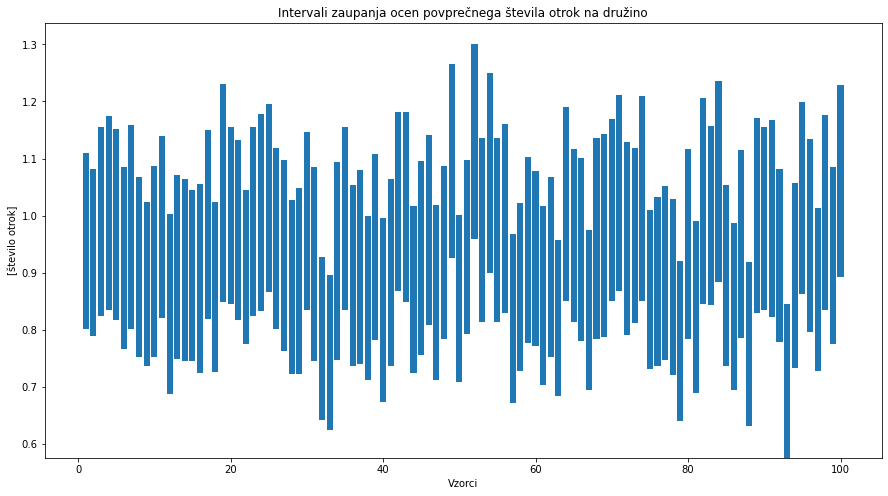

In [236]:
# Izris intervalov zaupanja
fig, ax = plt.subplots(figsize=(15, 8))
x = np.linspace(1, 100, 100)
ax.bar(x, 2*sirina_intervala, bottom=intervali_zaupanja[:, 0])
ax.set_xlabel('Vzorci')
ax.set_ylabel('[število otrok]')
ax.set_title('Intervali zaupanja ocen povprečnega števila otrok na družino')
plt.savefig('../rezultati/intervali_zaupanja_100_vzorcev.jpg', dpi=150)

In [237]:
# Izračun populacijskega povprečja, standardnega odklona in
# prave standardne napake za enostavne slučajne vzorce velikosti 200
populacija_otrok = druzine["'OTROK'"].to_numpy()
mi_otrok = populacija_otrok.mean()
std_otrok = populacija_otrok.std()
st_napaka_otrok_vzorcev = np.sqrt((N - n_vzorca) / (N - 1) * std_otrok**2 / n_vzorca)

In [238]:
# Primerjava standardne napake za prvi vzorec
print('Ocena standardne napake: ', SE[0])
print('Prava standardna napaka: ', st_napaka_otrok_vzorcev)

Ocena standardne napake:  0.07839300338333792
Prava standardna napaka:  0.0816404987959038


In [239]:
# Ali interval zapuanja pokrije populacijsko povprečje?
pokrije = intervali_zaupanja[0,0] < mi_otrok and mi_otrok < intervali_zaupanja[0, 1]
if pokrije:
    print('Da, interval zapuanja za prvi vzorec pokrije populacijsko povprečje.')
else:
    print('Ne, interval zapuanja za prvi vzorec ne pokrije populacijskega povprečja.')

Da, interval zapuanja za prvi vzorec pokrije populacijsko povprečje.


Število intervalov zaupanja, ki pokrivajo populacijsko povprečje, je 94


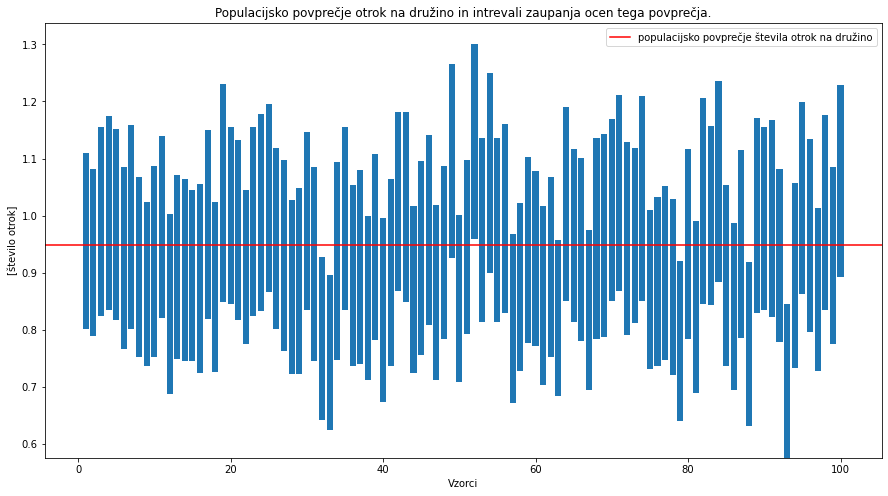

In [244]:
# Grafična primerjava intervalov zaupanja in populacijskega povprečja
fig, ax = plt.subplots(figsize=(15, 8))
x = np.linspace(1, 100, 100)
ax.bar(x, 2*sirina_intervala, bottom=intervali_zaupanja[:, 0])
izris_mi = ax.axhline(mi_otrok, color='r')
izris_mi.set_label('populacijsko povprečje števila otrok na družino')
ax.set_xlabel('Vzorci')
ax.set_ylabel('[število otrok]')
ax.legend()
ax.set_title('Populacijsko povprečje otrok na družino in intrevali zaupanja ocen tega povprečja.')
fig.savefig('../rezultati/intervali_zaupanja_100_vzorcev_pop_povprecje.jpg', dpi=150)

# Koliko od intervalov zaupanja izmed stotih vzorcev pokrije populacijsko povprečje?
stevilo_int_zaup_z_mi = (intervali_zaupanja[:, 0] < mi_otrok) == (mi_otrok < intervali_zaupanja[:, 1])
stevilo_int_zaup_z_mi = stevilo_int_zaup_z_mi.astype(int).sum()
print('Število intervalov zaupanja, ki pokrivajo populacijsko povprečje, je', stevilo_int_zaup_z_mi)

In [243]:
# Standardni odkloni
